# Data Visualization Deep Dive

If you don't pandas, matplotlib, or numpy installed, remove the # below and run the cell.

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install numpy

In [2]:
import pandas as pd
from matplotlib import colormaps
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("building_inventory.csv", na_values={'Square Footage': 0, 
                                                    'Year Constructed':0,
                                                    'Year Acquired':0}) 

In [4]:
df.head()

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1,1,0,Unusual,Unusual,Not provided


In [5]:
df.columns

Index(['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County',
       'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name',
       'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired',
       'Year Constructed', 'Square Footage', 'Total Floors',
       'Floors Above Grade', 'Floors Below Grade', 'Usage Description',
       'Usage Description 2', 'Usage Description 3'],
      dtype='object')

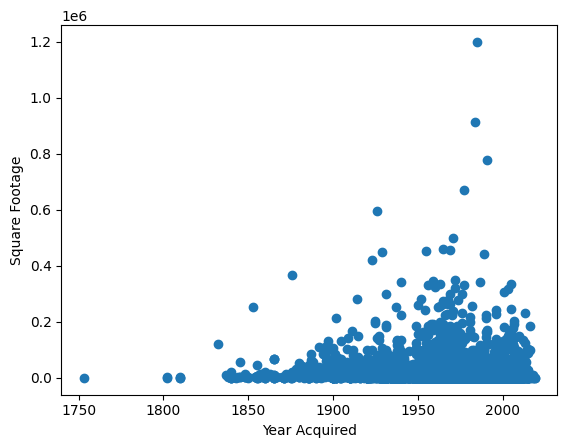

In [6]:
plt.scatter(x=df['Year Acquired'], y=df['Square Footage'])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

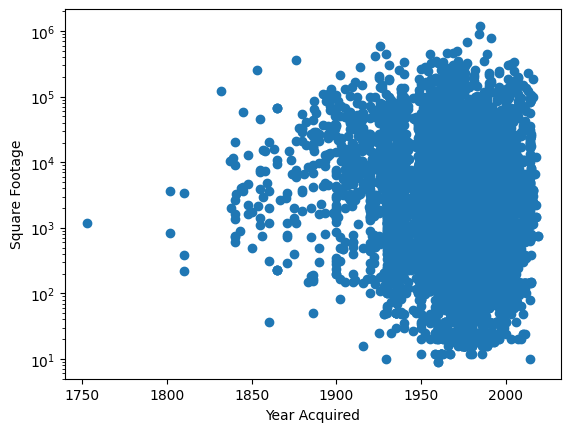

In [7]:
plt.scatter(x=df['Year Acquired'], y=df['Square Footage'])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.yscale('log') 
plt.show()

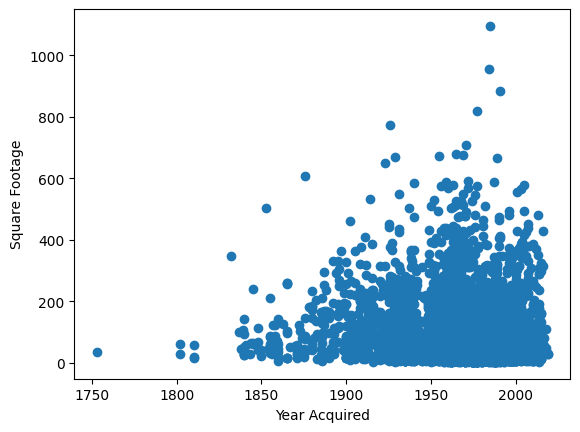

In [8]:
plt.scatter(x=df['Year Acquired'], y=np.sqrt(df['Square Footage']))
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

In [9]:
top_cities = df['City'].value_counts()[:5]
top_cities

City
Springfield    413
Carbondale     258
Grafton        231
Chicago        229
Urbana         204
Name: count, dtype: int64

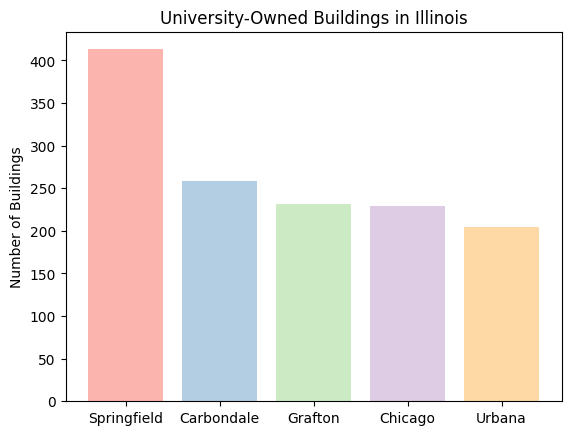

In [10]:
plt.bar(top_cities.index, top_cities.values, color=colormaps['Pastel1'].colors)
plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

In [11]:
correlation = df.corr(numeric_only=True)
correlation

,Zip code,Congress Dist,Rep Dist,Senate Dist,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade
Zip code,1.000000,0.218866,0.598157,0.600344,0.069296,0.062193,-0.057570,-0.089551,-0.082180,-0.077634
Congress Dist,0.218866,1.000000,0.346628,0.348020,0.067275,0.046652,-0.122240,-0.112438,-0.102596,-0.098043
Rep Dist,0.598157,0.346628,1.000000,0.999696,0.079117,0.074628,-0.115834,-0.140791,-0.126999,-0.137211
Senate Dist,0.600344,0.348020,0.999696,1.000000,0.079571,0.075060,-0.115338,-0.140414,-0.126558,-0.137039
Year Acquired,0.069296,0.067275,0.079117,0.079571,1.000000,0.912292,-0.077190,-0.281248,-0.251619,-0.332969
Year Constructed,0.062193,0.046652,0.074628,0.075060,0.912292,1.000000,-0.075795,-0.299877,-0.270222,-0.349383
Square Footage,-0.057570,-0.122240,-0.115834,-0.115338,-0.077190,-0.075795,1.000000,0.613257,0.617292,0.368142
Total Floors,-0.089551,-0.112438,-0.140791,-0.140414,-0.281248,-0.299877,0.613257,1.000000,0.967976,0.744792
Floors Above Grade,-0.082180,-0.102596,-0.126999,-0.126558,-0.251619,-0.270222,0.617292,0.967976,1.000000,0.591651
Floors Below Grade,-0.077634,-0.098043,-0.137211,-0.137039,-0.332969,-0.349383,0.368142,0.744792,0.591651,1.000000


In [12]:
correlation.shape

(10, 10)

In [13]:
correlation.columns.values

array(['Zip code', 'Congress Dist', 'Rep Dist', 'Senate Dist',
       'Year Acquired', 'Year Constructed', 'Square Footage',
       'Total Floors', 'Floors Above Grade', 'Floors Below Grade'],
      dtype=object)

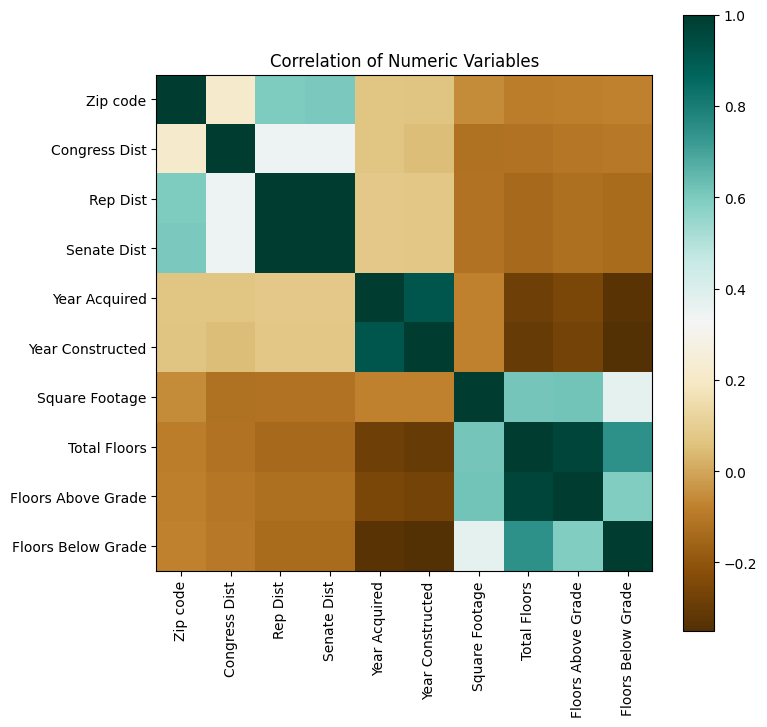

In [14]:
plt.figure(figsize=(8, 8))
plt.imshow(correlation)
plt.xticks(range(10), labels=correlation.columns.values, rotation=90)
plt.yticks(range(10), labels=correlation.columns.values)
plt.colorbar()
plt.set_cmap('BrBG')
plt.title("Correlation of Numeric Variables")
plt.show()

In [15]:
weather = pd.read_parquet("weather-train.parquet")
weather.head()

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5


In [16]:
august_2016 = weather[(weather.year == 2016) & (weather.month == 8)]

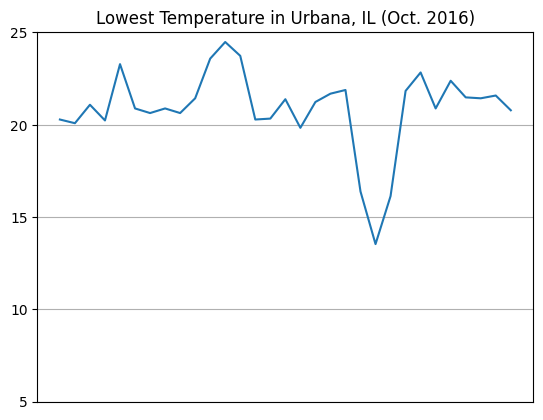

In [17]:
plt.plot(august_2016['temperature_2m_min'].values)
plt.xticks([])
plt.yticks(range(5, 30, 5))
plt.title("Lowest Temperature in Urbana, IL (Oct. 2016)")
plt.grid()
plt.show()

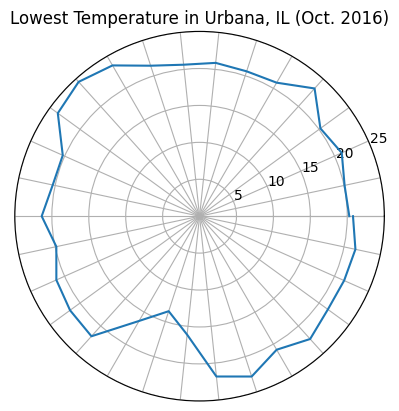

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'}) 
r = august_2016['temperature_2m_min'].values 
theta = np.linspace(0, 2*np.pi, num=31) 
ax.set_title("Lowest Temperature in Urbana, IL (Oct. 2016)")
ax.plot(theta, r) 
lines, lables = plt.thetagrids(list(np.linspace(0, 360, num=31)))
ax.set_xticklabels([])
plt.show()

In [19]:
year_2016 = weather[weather.year == 2016]
year_2016

,temperature_2m_min,year,month,day,day_of_year
date,,,,,
2016-01-01,-4.2715,2016,1,1,1
2016-01-02,-3.8715,2016,1,2,2
2016-01-03,-4.4715,2016,1,3,3
2016-01-04,-3.0215,2016,1,4,4
2016-01-05,-5.7715,2016,1,5,5
...,...,...,...,...,...
2016-12-27,-2.4715,2016,12,27,362
2016-12-28,-3.3215,2016,12,28,363
2016-12-29,0.1785,2016,12,29,364


In [20]:
heatmap = year_2016.pivot(index="month", columns="day", values="temperature_2m_min")
heatmap

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,-4.271500,-3.871500,-4.471500,-3.021500,-5.771500,-3.771500,-1.221500,5.228500,1.728500,-10.821500,...,-7.071500,-7.321500,-6.371500,-1.621500,-1.921500,-3.071500,-1.221500,-3.721500,0.828500,5.878500
2,-0.221500,0.678500,0.328500,-5.571500,-4.371500,-5.471500,0.978500,-4.521500,-7.671500,-12.071500,...,-2.121500,-2.171500,-0.521500,-0.421500,-3.871500,-5.171500,5.628500,-0.021500,NaN,NaN
3,-1.071500,-6.921500,0.278500,-3.271500,0.078500,-2.371500,8.428500,13.778501,15.128500,8.228500,...,5.678500,12.378500,7.978500,-0.821500,0.978500,4.678500,4.528500,0.628500,5.928500,15.078500
4,3.828500,0.578500,-2.271500,1.878500,-3.471500,6.978500,3.078500,-0.071500,-4.171500,0.628500,...,10.778501,5.878500,8.378500,15.178500,16.678499,11.178500,13.678500,8.278501,10.128500,NaN
5,12.128500,8.728500,7.028500,10.128500,5.278500,5.728500,15.778501,8.128500,11.478500,15.928500,...,8.478500,10.528501,14.678500,17.278500,19.178499,18.878500,19.728498,18.128500,14.778501,17.728498
6,18.528500,17.128500,14.178500,17.378500,16.078499,17.928499,14.678500,10.428500,14.578500,20.578499,...,20.628500,21.728498,18.328499,19.678499,24.178499,19.228498,18.528500,12.378500,13.778501,NaN
7,18.978498,12.778501,14.978500,17.628500,17.928499,22.728498,19.228498,20.978498,18.078499,16.228498,...,23.228498,21.978498,24.078499,24.178499,21.478498,18.778500,21.928499,20.228498,18.028500,17.978498
8,20.278500,20.078499,21.078499,20.228498,23.278500,20.878500,20.628500,20.878500,20.628500,21.428499,...,13.528501,16.128500,21.828499,22.828499,20.878500,22.378500,21.478498,21.428499,21.578499,20.778500
9,16.128500,15.278501,14.828500,15.678500,20.178499,23.278500,24.478498,24.078499,18.728498,18.778500,...,17.478498,19.228498,20.028500,19.478498,14.728500,13.278501,13.378500,13.178500,14.678500,NaN


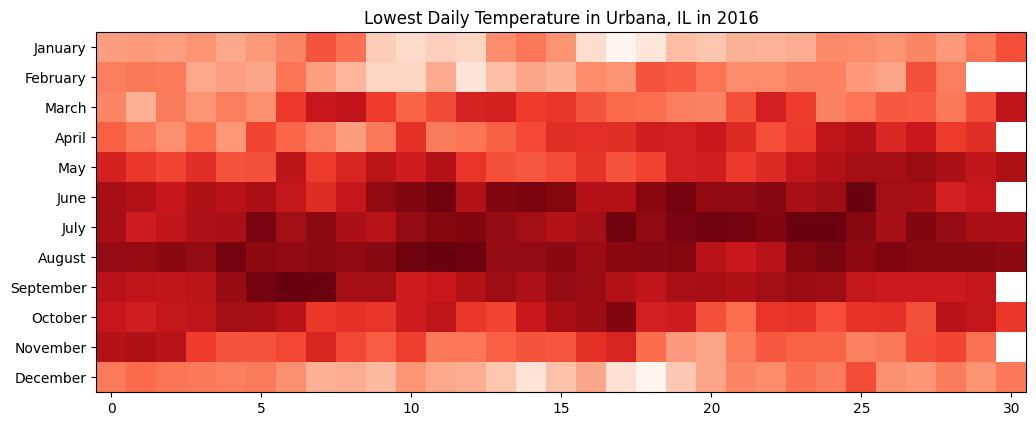

In [21]:
plt.figure(figsize=(12, 8))
plt.imshow(heatmap)
plt.yticks(range(12), labels=['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'])
plt.set_cmap('Reds')
plt.title("Lowest Daily Temperature in Urbana, IL in 2016")
plt.show()